In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from garanapy import event
from garanapy import plotting

In [2]:
data_path = "../data"

In [3]:
data_manager = event.DataManager()
data_manager.open_events(data_path, n_files=-1)

Output()

In [4]:
# Save the loaded events for later
data_manager.save("loaded_events.pickle")

In [3]:
# Later is now!
with open("loaded_events.pickle", 'rb') as inp:
    data_manager = pickle.load(inp)

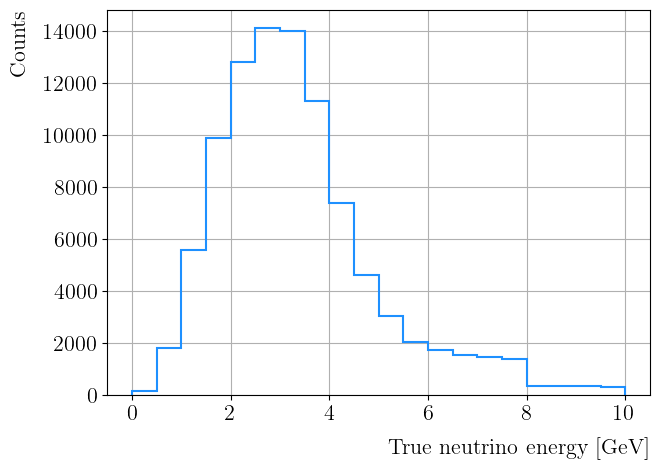

In [4]:
# Plot true neutrino energy
fig, ax = plt.subplots(figsize=(7,5))

plt.hist(data_manager.get_true_nu_energy(), bins=np.linspace(0.0, 10.0, 21), histtype="step", linewidth=1.5, color="dodgerblue")

ax.set_xlabel("True neutrino energy [GeV]", fontsize=16, labelpad=10, loc="right")
ax.set_ylabel("Counts", fontsize=16, labelpad=10, loc="top")

ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid()

plt.show()

In [5]:
data_manager.search_primary_muon()

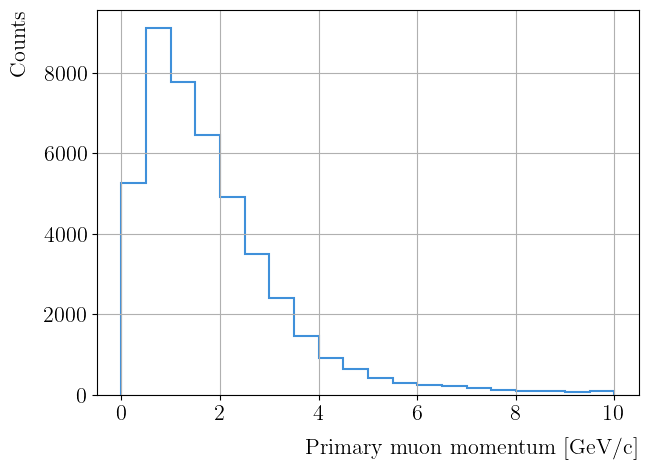

In [9]:
fig, ax = plt.subplots(figsize=(7,5))

data_manager.compute_primary_muon_momentum().get_histogram(ax)

ax.set_xlabel("Primary muon momentum [GeV/c]", fontsize=16, labelpad=10, loc="right")
ax.set_ylabel("Counts", fontsize=16, labelpad=10, loc="top")

ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid()

plt.show()

In [7]:
data_manager.compute_primary_muon_performance()

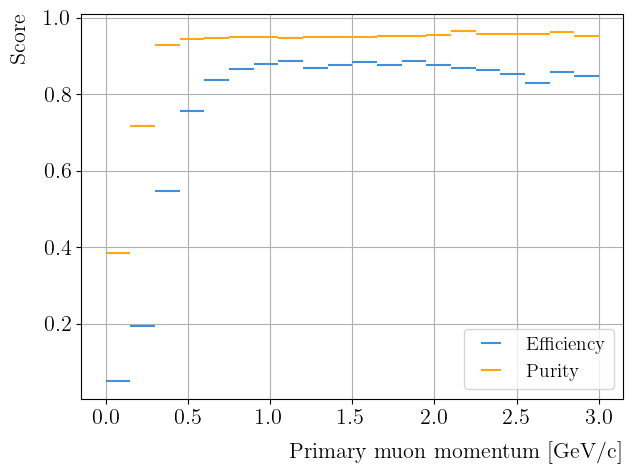

In [10]:
fig, ax = plt.subplots(figsize=(7,5))

data_manager.efficiency_hist.get_histogram_errorbar(ax)
data_manager.purity_hist.get_histogram_errorbar(ax)

ax.set_xlabel("Primary muon momentum [GeV/c]", fontsize=16, labelpad=10, loc="right")
ax.set_ylabel("Score", fontsize=16, labelpad=10, loc="top")

ax.legend(fontsize=14, loc="lower right")

ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid()

plt.show()